<a href="https://colab.research.google.com/github/antonellafontanetto/Achivos_Extras/blob/main/Modelo_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 4x4 YPF - Primer pilar Vaca Muerta**

En esta etapa del proyecto 4x4, se aplicaron t√©cnicas de Machine Learning no supervisado con el objetivo de explorar patrones ocultos en los datos energ√©ticos sin necesidad de contar con una variable objetivo definida. El an√°lisis se centr√≥ en identificar agrupamientos naturales entre las variables de producci√≥n de petr√≥leo y  producci√≥n de gas de YPF en Vaca Muerta. Esto permiti√≥ observar c√≥mo se comportan los distintos a√±os en funci√≥n de estos indicadores clave, y detectar posibles trayectorias de desarrollo o per√≠odos at√≠picos en el cumplimiento del plan.

Se utilizaron algoritmos como K-means, TimeSeriesK-means y DBSCAN para realizar el an√°lisis de cl√∫steres, luego se aplico una reducci√≥n de dimensionalidad con PCA para facilitar la visualizaci√≥n y mejorar la eficiencia del modelo. El modelo K-means permiti√≥ identificar segmentos diferenciados de a√±os con comportamientos similares, evaluando la cohesi√≥n de los grupos mediante el coeficiente de Silhouette. Por otro lado, DBSCAN ofreci√≥ una perspectiva alternativa m√°s robusta frente a posibles valores at√≠picos y permiti√≥ detectar densidades inusuales que podr√≠an reflejar cambios estructurales en la producci√≥n o en la estrategia comercial de la empresa.

Estos resultados complementan el an√°lisis supervisado y las proyecciones realizadas previamente con modelos como Prophet, y ofrecen una herramienta exploratoria poderosa para segmentar per√≠odos hist√≥ricos, evaluar el impacto de decisiones estrat√©gicas y anticipar posibles escenarios futuros. Este enfoque no supervisado aporta valor al proyecto 4x4 al permitir entender mejor la evoluci√≥n de los indicadores clave sin imponer supuestos previos, favoreciendo as√≠ una mirada m√°s abierta y data-driven del crecimiento de YPF en la Cuenca Neuquina.

### Importamos las libbrer√≠as

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Cargamos el dataset

In [2]:
#Cargamos el dataset transformado en la segunda pre-entrega pero con los datos agrupados mensualmente
Produccion_ypf = pd.read_csv('/content/prod_encoded_df (2).csv')

#Aplicamos la funci√≥n head() para visualizar las primeras 5 observaciones del dataset
Produccion_ypf.head().astype(int)

Tipo de pozo_Gas√≠fero  Tipo de pozo_Inyecci√≥n de Agua  \
0                      1                               0   
1                      1                               0   
2                      1                               0   
3                      1                               0   
4                      1                               0   

   Tipo de pozo_Otro tipo  Tipo de pozo_Petrol√≠fero  Tipo de pozo_Sumidero  \
0                       0                         0                      0   
1                       0                         0                      0   
2                       0                         0                      0   
3                       0                         0                      0   
4                       0                         0                      0   

   Tipo de recurso_NO CONVENCIONAL  Subtipo de recurso_SHALE  \
0                                1                         1   
1                                1                         1   
2                                1                         1   
3                                1                         1   
4                                1                         1   

   Subtipo de recurso_TIGHT  Area de permiso de concesion_AGUADA DE LA ARENA  \
0                         0                                                1   
1                         0                                                1   
2                         0                                                1   
3                         0                                                1   
4                         0                                                1   

   Area de permiso de concesion_AGUADA DEL CHA√ëAR  ...  \
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   

   Area de permiso de concesion_NARAMBUENA  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Area de permiso de concesion_OCTOGONO  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Area de permiso de concesion_PASO DE LAS BARDAS NORTE  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Area de permiso de concesion_RINCON DEL MANGRULLO  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Area de permiso de concesion_RIO NEUQUEN  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Area de permiso de concesion_VALLE DEL RIO GRANDE  Produccion de Petroleo  \
0                                                  0                     555   
1                                                  0                     472   
2                                                  0                    1082   
3                                                  0                     678   
4                              

### Columnas a eliminar

In [3]:
#Creamos una copia del dataset original
Produccion_ypf_copia2 = Produccion_ypf.copy()

columnas_a_eliminar = [
    'Tipo de pozo_Inyecci√≥n de Agua',
    'Tipo de pozo_Otro tipo',
    'Tipo de pozo_Sumidero',
    'Tipo de recurso_NO CONVENCIONAL',
    'Producci√≥n de agua',
    'Area de permiso de concesion_AGUADA DEL CHA√ëAR',
    'Area de permiso de concesion_AL NORTE DE LA DORSAL',
    'Area de permiso de concesion_BAJO DEL TORO',
    'Area de permiso de concesion_CERRO ARENA ',
    'Area de permiso de concesion_CERRO LAS MINAS ',
    'Area de permiso de concesion_CERRO MANRIQUE',
    'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
    'Area de permiso de concesion_CN VII A',
    'Area de permiso de concesion_DADIN',
    'Area de permiso de concesion_BAJO DEL TORO NORTE',
    'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
    'Area de permiso de concesion_FILO MORADO',
    'Area de permiso de concesion_LA ANGOSTURA SUR I',
    'Area de permiso de concesion_LA ANGOSTURA SUR II',
    'Area de permiso de concesion_LA RIBERA BLOQUE I',
    'Area de permiso de concesion_LA RIBERA BLOQUE II',
    'Area de permiso de concesion_LAS TACANAS'
]

#Con la funci√≥n drop eliminamos las columnas que consideramos que no son necesarias para el an√°lisis, en este caso solo dejamos las principales √°reas de permiso de concesi√≥n por producci√≥n de petr√≥leo y gas
Produccion_ypf = Produccion_ypf.drop(columns=columnas_a_eliminar, errors='ignore')

Produccion_ypf.head()

Tipo de pozo_Gas√≠fero  Tipo de pozo_Petrol√≠fero  Subtipo de recurso_SHALE  \
0                    1.0                       0.0                       1.0   
1                    1.0                       0.0                       1.0   
2                    1.0                       0.0                       1.0   
3                    1.0                       0.0                       1.0   
4                    1.0                       0.0                       1.0   

   Subtipo de recurso_TIGHT  Area de permiso de concesion_AGUADA DE LA ARENA  \
0                       0.0                                              1.0   
1                       0.0                                              1.0   
2                       0.0                                              1.0   
3                       0.0                                              1.0   
4                       0.0                                              1.0   

   Area de permiso de concesion_BAJO DEL TORO    \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Area de permiso de concesion_BANDURRIA SUR  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Area de permiso de concesion_EL OREJANO  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Area de permiso de concesion_LA AMARGA CHICA  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Area de permiso de concesion_LA RIBERA BLOQUE I   ...  \
0                                               0.0  ...   
1                                               0.0  ...   
2                                               0.0  ...   
3                                               0.0  ...   
4                                               0.0  ...   

   Area de permiso de concesion_NARAMBUENA  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Area de permiso de concesion_OCTOGONO  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Area de permiso de concesion_PASO DE LAS BARDAS NORTE  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   Area de permiso de concesion_RINCON DEL MANGRULLO  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Area de permiso de concesion_RIO NEUQUEN  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                

## **Clustering**

## **K-Means**

El algoritmo K-Means es un modelo de aprendizaje no supervisado que se utiliza para identificar grupos o patrones ocultos dentro de un conjunto de datos sin necesidad de etiquetas previas.

Su objetivo es dividir los datos en k cl√∫steres distintos, de manera que los puntos dentro de cada cl√∫ster sean lo m√°s similares entre s√≠ posible (alta cohesi√≥n), y lo m√°s distintos de los otros grupos (alta separaci√≥n).

Esto se logra asignando cada observaci√≥n al cl√∫ster con el centroide m√°s cercano, y actualizando esos centroides de forma iterativa hasta alcanzar la convergencia.

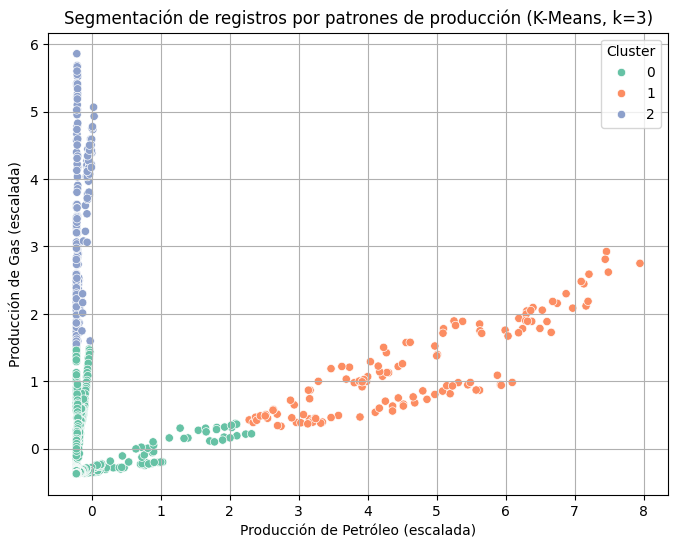

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar variables num√©ricas
X = Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']].dropna()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Visualizar
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2')
plt.xlabel('Producci√≥n de Petr√≥leo (escalada)')
plt.ylabel('Producci√≥n de Gas (escalada)')
plt.title('Segmentaci√≥n de registros por patrones de producci√≥n (K-Means, k=3)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

El gr√°fico muestra la segmentaci√≥n de registros de producci√≥n de petr√≥leo y gas utilizando K-Means con k=3. Cada punto representa un registro escalado y fue agrupado seg√∫n patrones de producci√≥n. Se identifican tres cl√∫steres diferenciados: uno con alta producci√≥n de petr√≥leo, otro con alta producci√≥n de gas, y un tercero con niveles bajos en ambos recursos.

### Silhouette Score

El Silhouette Score describe qu√© tan bien separadas y cohesionadas est√°n las agrupaciones (cl√∫steres) generadas por un algoritmo de clustering, como K-Means o TimeSeriesKMeans.

In [5]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.900


El Silhouette Score obtenido fue de 0.900, lo que indica una excelente calidad de agrupamiento. Las series temporales fueron correctamente agrupadas con alta cohesi√≥n interna y buena separaci√≥n entre cl√∫steres, validando la efectividad del modelo no supervisado aplicado.

### Inertia (Suma de errores cuadrados dentro del cl√∫ster)

In [6]:
print(f"Inercia (SSE): {kmeans.inertia_:.2f}")


Inercia (SSE): 945.01


La inercia (SSE) obtenida fue de 945.01, lo que representa la suma total de las distancias entre cada serie temporal y el centroide de su cl√∫ster. Un valor m√°s bajo de inercia indica que las series dentro de cada cl√∫ster est√°n m√°s agrupadas entre s√≠, lo que refuerza la calidad del agrupamiento logrado.

### Davies-Bouldin Index (mide la separaci√≥n entre cl√∫steres: m√°s bajo = mejor)

In [7]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Index: {db_index:.3f}")


Davies-Bouldin Index: 0.413


El Davies-Bouldin Index obtenido fue de 0.413, lo que indica una buena separaci√≥n entre cl√∫steres. Este √≠ndice mide la relaci√≥n entre la dispersi√≥n dentro de los cl√∫steres y la distancia entre ellos, donde valores m√°s bajos reflejan mejor calidad de agrupamiento.

### Gr√°fico Silhouette

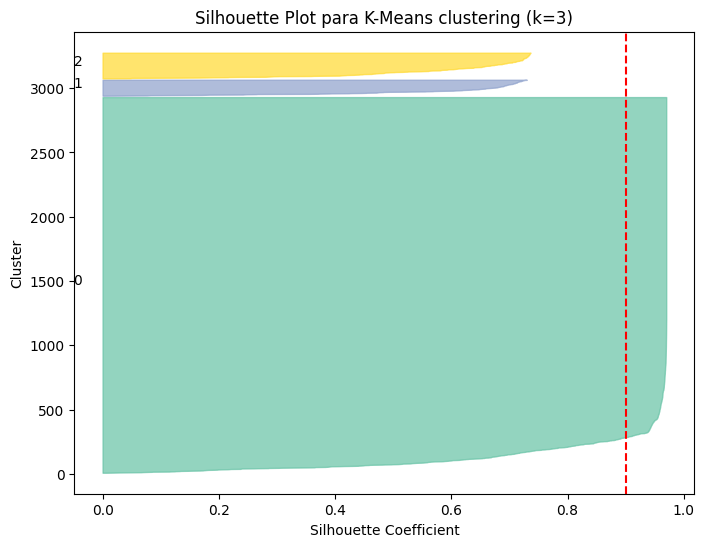

In [8]:
from sklearn.metrics import silhouette_samples
import numpy as np

silhouette_vals = silhouette_samples(X_scaled, labels)

plt.figure(figsize=(8,6))
y_lower = 10
for i in range(3):  # 3 clusters
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster

    color = plt.cm.Set2(i / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=silhouette_score(X_scaled, labels), color="red", linestyle="--")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot para K-Means clustering (k=3)")
plt.show()


El gr√°fico de silueta permite evaluar la calidad del agrupamiento con K-Means (k=3). La mayor√≠a de los registros presenta coeficientes cercanos a 1, lo que indica que est√°n correctamente asignados a sus cl√∫steres. La l√≠nea roja marca el Silhouette Score promedio, que en este caso refleja una excelente separaci√≥n entre grupos.

### M√©todo Elbow






El m√©todo del codo es una t√©cnica gr√°fica que ayuda a determinar el n√∫mero √≥ptimo de cl√∫steres (k) en un modelo de agrupamiento. Consiste en calcular la inercia (SSE: suma de errores al cuadrado) para distintos valores de k y graficarlos. A medida que se incrementa k, la inercia disminuye, ya que los cl√∫steres son m√°s peque√±os y mejor ajustados.

El "codo" del gr√°fico aparece en el punto donde la reducci√≥n de inercia comienza a ser menos pronunciada, lo cual indica que aumentar el n√∫mero de cl√∫steres deja de aportar mejoras significativas. Este punto se interpreta como el n√∫mero √≥ptimo de cl√∫steres a utilizar.

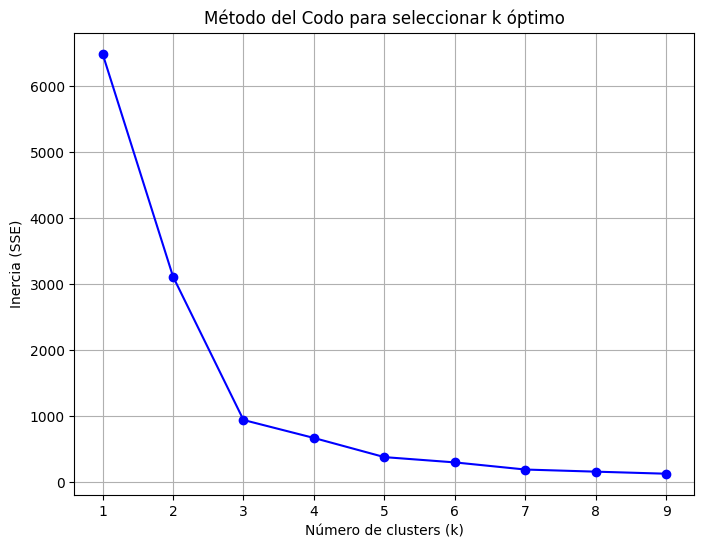

In [9]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('M√©todo del Codo para seleccionar k √≥ptimo')
plt.grid(True)
plt.show()


El gr√°fico muestra la variaci√≥n de la inercia (SSE) seg√∫n el n√∫mero de cl√∫steres. Se observa un punto de inflexi√≥n en k=3, lo que sugiere que tres cl√∫steres es una elecci√≥n adecuada para lograr un buen equilibrio entre simplicidad del modelo y cohesi√≥n interna de los grupos.

### M√©todo Elbow con un rango m√°s amplio

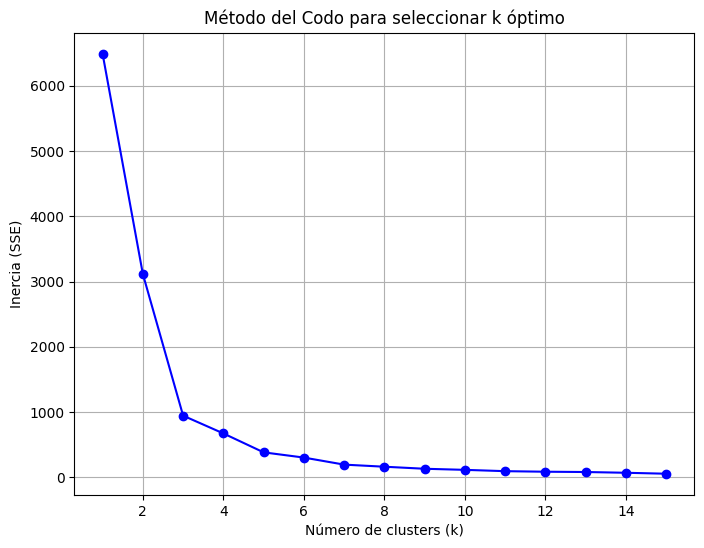

In [10]:
inertia = []
K = range(1, 16)  # De 1 a 15 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('N√∫mero de clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.title('M√©todo del Codo para seleccionar k √≥ptimo')
plt.grid(True)
plt.show()


## **TimeSeriesKMeans**


Time Series K-Means es una extensi√≥n del algoritmo K-Means tradicional, dise√±ada para agrupar series temporales en funci√≥n de sus patrones de forma a lo largo del tiempo. A diferencia del K-Means cl√°sico, que usa distancia eucl√≠dea y est√° orientado a datos est√°ticos, esta versi√≥n puede utilizar m√©tricas especializadas como DTW (Dynamic Time Warping), que permite comparar series aunque est√©n desfasadas temporalmente.

El algoritmo agrupa las series en k cl√∫steres minimizando la distancia entre cada serie y el "centroide" representativo de su grupo. Este enfoque es √∫til para identificar comportamientos o tendencias similares entre distintas unidades temporales (como a√±os, meses o regiones) en contextos como producci√≥n energ√©tica, demanda, ventas, etc.

En este proyecto, se utiliz√≥ Time Series K-Means para segmentar series anuales de producci√≥n de petr√≥leo y gas, permitiendo descubrir grupos con patrones de evoluci√≥n similares a lo largo de los meses.

In [11]:
# Agrupar por A√±o y Mes sumando la producci√≥n
df_agrupado = Produccion_ypf.groupby(['A√±o', 'Mes'], as_index=False)[['Produccion de Petroleo', 'Produccion de Gas']].sum()

# Ahora s√≠ pivotear
petroleo_pivot = df_agrupado.pivot(index='A√±o', columns='Mes', values='Produccion de Petroleo')
gas_pivot = df_agrupado.pivot(index='A√±o', columns='Mes', values='Produccion de Gas')


In [12]:
# Asegurar que los meses est√©n en orden correcto (1 al 12)
Produccion_ypf['Mes'] = pd.Categorical(Produccion_ypf['Mes'], categories=list(range(1,13)), ordered=True)

# Agrupar para evitar duplicados por A√±o y Mes
df_agrupado = Produccion_ypf.groupby(['A√±o', 'Mes'], as_index=False)[['Produccion de Petroleo', 'Produccion de Gas']].sum()

# Pivotear para petr√≥leo
petroleo_pivot = df_agrupado.pivot(index='A√±o', columns='Mes', values='Produccion de Petroleo')

# Pivotear para gas
gas_pivot = df_agrupado.pivot(index='A√±o', columns='Mes', values='Produccion de Gas')


/tmp/ipython-input-12-3702145819.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = Produccion_ypf.groupby(['A√±o', 'Mes'], as_index=False)[['Produccion de Petroleo', 'Produccion de Gas']].sum()


In [13]:
!pip install tslearn

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 374.4/374.4 kB 6.7 MB/s eta 0:00:00


In [14]:
import numpy as np
from tslearn.preprocessing import TimeSeriesScalerMinMax

# Convertir a arrays 3D (n_series, n_timestamps, 1)
X_petroleo = petroleo_pivot.values[:, :, np.newaxis]
X_gas = gas_pivot.values[:, :, np.newaxis]

# Escalamos (opcional pero recomendable)
scaler = TimeSeriesScalerMinMax()
X_petroleo_scaled = scaler.fit_transform(X_petroleo)
X_gas_scaled = scaler.fit_transform(X_gas)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [29]:
from tslearn.clustering import TimeSeriesKMeans

model_petroleo = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
labels_petroleo = model_petroleo.fit_predict(X_petroleo_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [30]:
model_gas = TimeSeriesKMeans(n_clusters=5, metric="dtw", random_state=0)
labels_gas = model_gas.fit_predict(X_gas_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Patrones promedio de producci√≥n de petr√≥leo por cl√∫ster (Time Series K-Means, k=5)

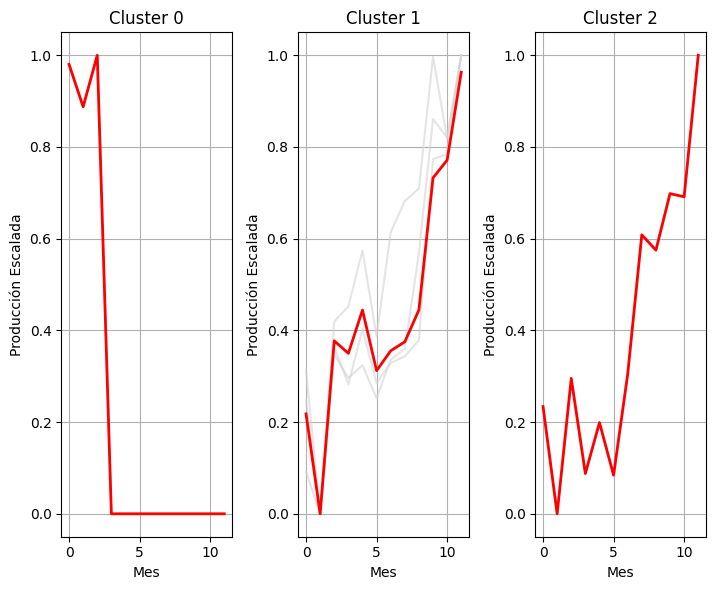

In [32]:
import matplotlib.pyplot as plt

# Graficar los cl√∫steres
plt.figure(figsize=(12, 6))

for cluster in range(3):
    plt.subplot(1, 5, cluster + 1)
    for i, serie in enumerate(X_petroleo_scaled[labels_petroleo == cluster]):
        plt.plot(serie.ravel(), color="lightgray", alpha=0.6)
    plt.plot(model_petroleo.cluster_centers_[cluster].ravel(), color="red", linewidth=2)
    plt.title(f"Cluster {cluster}")
    plt.xlabel("Mes")
    plt.ylabel("Producci√≥n Escalada")
    plt.grid(True)

plt.tight_layout()
plt.show()


El gr√°fico muestra los centroides representativos de cada cl√∫ster generados por Time Series K-Means sobre la producci√≥n mensual escalada de petr√≥leo. Cada curva resume el patr√≥n promedio de un grupo de series anuales, permitiendo identificar distintos comportamientos de producci√≥n a lo largo del tiempo.

### Patrones promedio de producci√≥n de gas por cl√∫ster (Time Series K-Means, k=5)

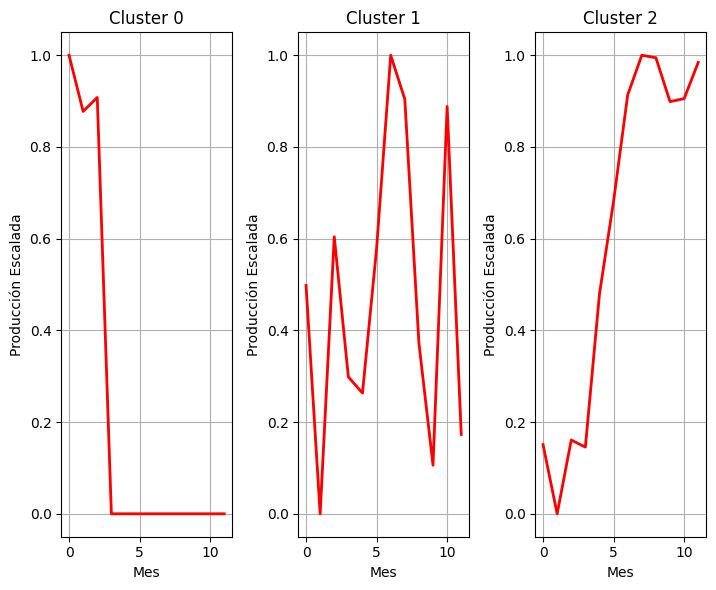

In [33]:
import matplotlib.pyplot as plt

# Graficar los cl√∫steres
plt.figure(figsize=(12, 6))

for cluster in range(3):
    plt.subplot(1, 5, cluster + 1)
    for i, serie in enumerate(X_gas_scaled[labels_gas == cluster]):
        plt.plot(serie.ravel(), color="lightgray", alpha=0.6)
    plt.plot(model_gas.cluster_centers_[cluster].ravel(), color="red", linewidth=2)
    plt.title(f"Cluster {cluster}")
    plt.xlabel("Mes")
    plt.ylabel("Producci√≥n Escalada")
    plt.grid(True)

plt.tight_layout()
plt.show()

### M√©todo Silhouette

In [19]:
from sklearn.metrics import silhouette_score
from tslearn.metrics import cdist_dtw

# Matriz de distancias DTW entre todas las series
distance_matrix = cdist_dtw(X_scaled)

# Silhouette Score con precomputed distances
sil_score = silhouette_score(distance_matrix, labels, metric="precomputed")
print(f"Silhouette Score (DTW): {sil_score:.3f}")


Silhouette Score (DTW): 0.900


El modelo Time Series K-Means alcanz√≥ un Silhouette Score (DTW) de 0.900, lo que indica una excelente calidad de agrupamiento. Este valor sugiere que las series temporales de producci√≥n fueron agrupadas con alta cohesi√≥n interna y buena separaci√≥n entre cl√∫steres, validando la eficacia del uso de DTW como m√©trica de similitud.



In [34]:
n_clusters = 3  # el n√∫mero de clusters


### Patrones promedio de producci√≥n de petr√≥leo por cl√∫ster (Time Series K-Means, k=3)

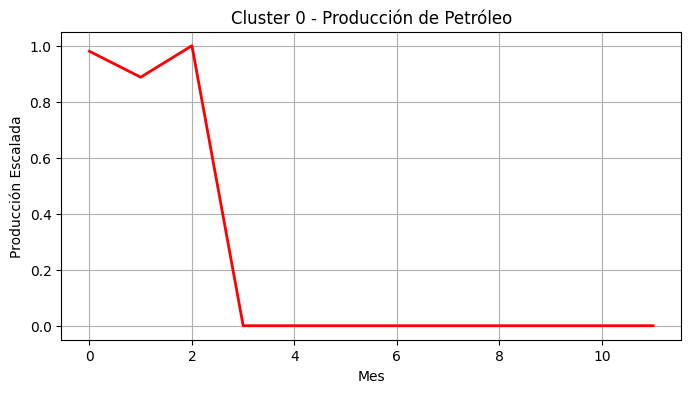

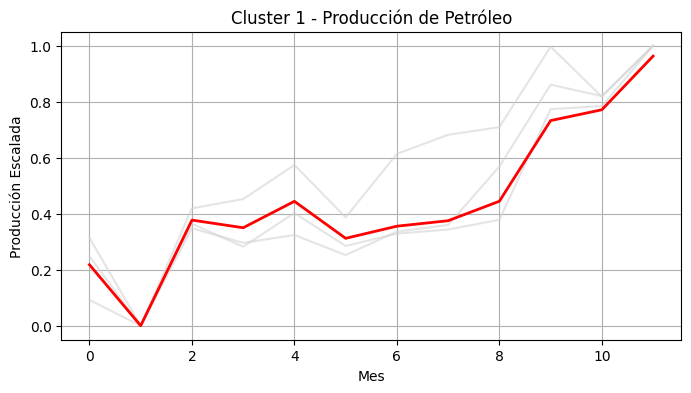

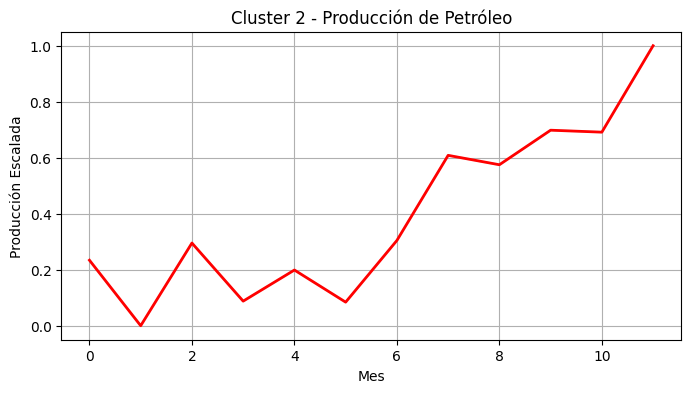

In [35]:
for cluster in range(n_clusters):
    plt.figure(figsize=(8,4))
    for serie in X_petroleo_scaled[labels_petroleo == cluster]:
        plt.plot(serie.ravel(), color="lightgray", alpha=0.6)
    plt.plot(model_petroleo.cluster_centers_[cluster].ravel(), color="red", linewidth=2)
    plt.title(f"Cluster {cluster} - Producci√≥n de Petr√≥leo")
    plt.xlabel("Mes")
    plt.ylabel("Producci√≥n Escalada")
    plt.grid(True)
    plt.show()


### Patrones promedio de producci√≥n de gas por cl√∫ster (Time Series K-Means, k=3)

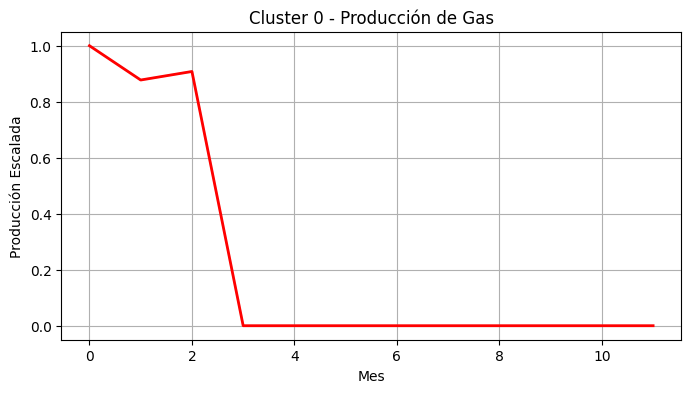

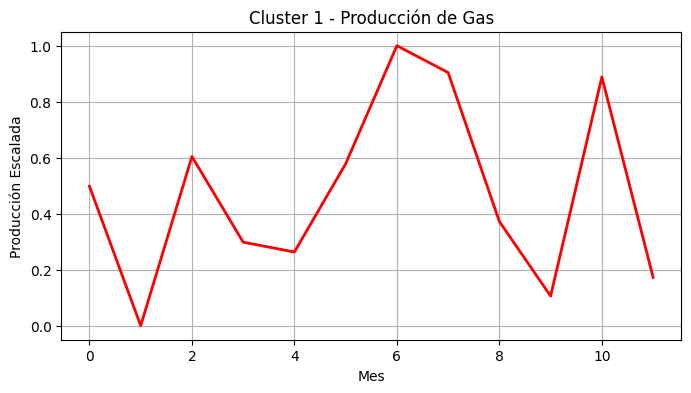

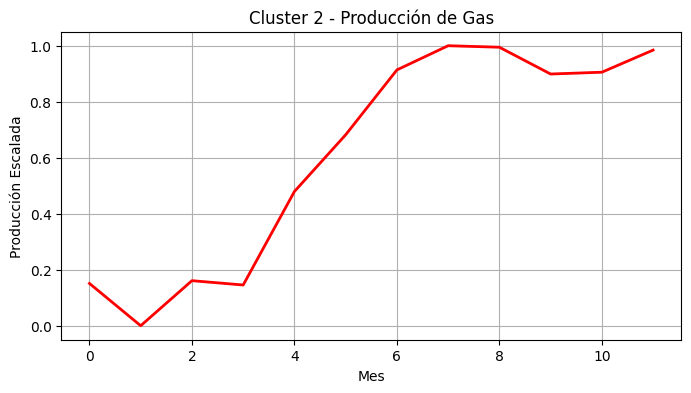

In [36]:
for cluster in range(n_clusters):
    plt.figure(figsize=(8,4))
    for serie in X_gas_scaled[labels_gas == cluster]:
        plt.plot(serie.ravel(), color="lightgray", alpha=0.6)
    plt.plot(model_gas.cluster_centers_[cluster].ravel(), color="red", linewidth=2)
    plt.title(f"Cluster {cluster} - Producci√≥n de Gas")
    plt.xlabel("Mes")
    plt.ylabel("Producci√≥n Escalada")
    plt.grid(True)
    plt.show()

In [37]:
import numpy as np

labels_petroleo = np.array(labels_petroleo)

unique_labels, counts = np.unique(labels_petroleo, return_counts=True)

print("üìä Distribuci√≥n de observaciones por cluster:")
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} observaciones")


üìä Distribuci√≥n de observaciones por cluster:
Cluster 0: 1 observaciones
Cluster 1: 3 observaciones
Cluster 2: 1 observaciones


## **DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering que agrupa puntos cercanos seg√∫n una densidad m√≠nima, identificando regiones densas como clusters y marcando puntos aislados como ruido o outliers. No requiere definir el n√∫mero de clusters previamente y es especialmente √∫til para descubrir formas arbitrarias en los datos.

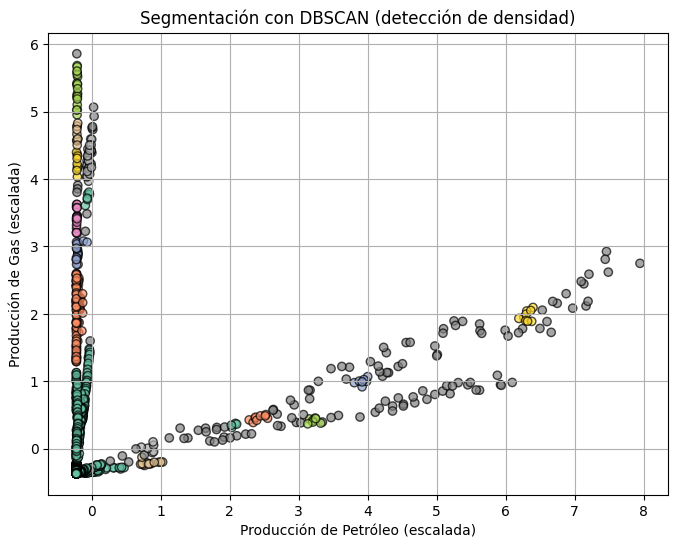

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Seleccionar variables num√©ricas
X = Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']].dropna()

# 2. Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=4)  # Pod√©s ajustar estos valores
labels = dbscan.fit_predict(X_scaled)

# 4. Crear DataFrame para graficar
df_dbscan = pd.DataFrame(X_scaled, columns=['Petr√≥leo (escalado)', 'Gas (escalado)'])
df_dbscan['Cluster'] = labels

# 5. Visualizar
plt.figure(figsize=(8,6))
palette = sns.color_palette('Set2', n_colors=len(set(labels)) - (1 if -1 in labels else 0))
colors = [palette[label] if label != -1 else (0.5, 0.5, 0.5) for label in labels]  # gris para ruido

plt.scatter(df_dbscan['Petr√≥leo (escalado)'], df_dbscan['Gas (escalado)'], c=colors, alpha=0.7, edgecolor='k')
plt.title('Segmentaci√≥n con DBSCAN (detecci√≥n de densidad)')
plt.xlabel('Producci√≥n de Petr√≥leo (escalada)')
plt.ylabel('Producci√≥n de Gas (escalada)')
plt.grid(True)
plt.show()


### k-dist plot

Para elegir un buen valor de eps en DBSCAN, se usa un gr√°fico llamado k-dist plot, que muestra la distancia al vecino k-√©simo m√°s cercano para cada punto. Donde el gr√°fico hace ‚Äúcodo‚Äù es un buen candidato para eps.

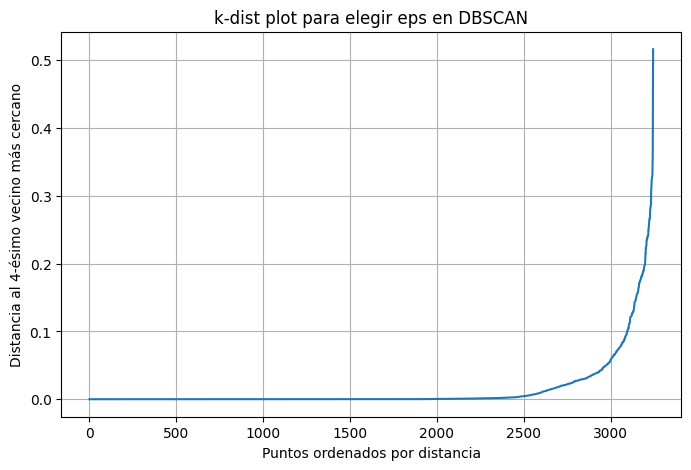

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Par√°metros
k = 4  # usualmente min_samples

# Calcular distancias a k-√©simo vecino m√°s cercano
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Tomar la distancia al vecino k-√©simo para cada punto
k_distances = np.sort(distances[:, k-1])

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.ylabel(f'Distancia al {k}-√©simo vecino m√°s cercano')
plt.xlabel('Puntos ordenados por distancia')
plt.title('k-dist plot para elegir eps en DBSCAN')
plt.grid(True)
plt.show()


### N√∫mero de clusters detectados

In [41]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"N√∫mero de clusters: {n_clusters}")
print(f"N√∫mero de outliers: {n_noise}")


N√∫mero de clusters: 17
N√∫mero de outliers: 128


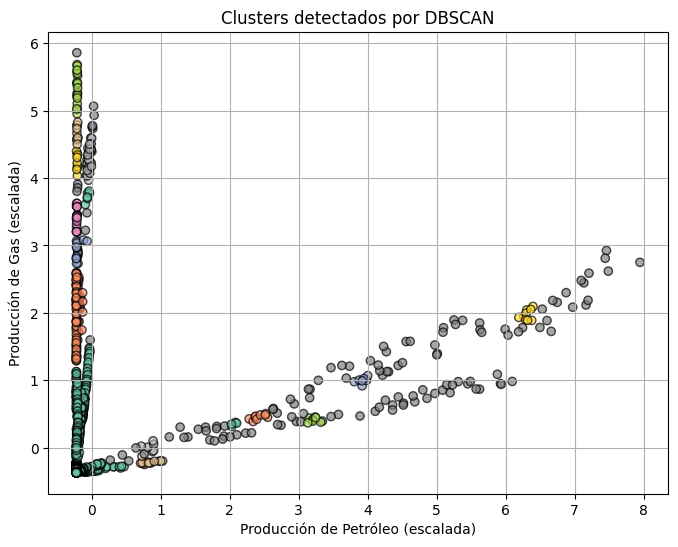

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supongamos que ya ten√©s X_scaled y labels del DBSCAN
df_clusters = pd.DataFrame(X_scaled, columns=['Petr√≥leo (escalado)', 'Gas (escalado)'])
df_clusters['Cluster'] = labels

# Palette con colores para cada cluster excepto el ruido (-1)
palette = sns.color_palette('Set2', n_colors=len(set(labels)) - (1 if -1 in labels else 0))

# Asignar color: clusters a colores, ruido a gris
colors = [palette[label] if label != -1 else (0.5, 0.5, 0.5) for label in labels]

plt.figure(figsize=(8,6))
plt.scatter(df_clusters['Petr√≥leo (escalado)'], df_clusters['Gas (escalado)'],
            c=colors, alpha=0.7, edgecolor='k')

plt.title('Clusters detectados por DBSCAN')
plt.xlabel('Producci√≥n de Petr√≥leo (escalada)')
plt.ylabel('Producci√≥n de Gas (escalada)')
plt.grid(True)
plt.show()


## **MeanShift**

MeanShift es un algoritmo de clustering no param√©trico que encuentra grupos (clusters) en los datos sin necesidad de especificar cu√°ntos clusters buscar de antemano. Funciona buscando modos de densidad en el espacio de caracter√≠sticas, es decir, regiones donde los datos est√°n m√°s concentrados.

El algoritmo:

* Coloca una "ventana" o kernel en cada punto de datos.

* Calcula el centro de masa (media) dentro de esa ventana.

* Desplaza la ventana hacia esa media.

* Repite este proceso hasta que converge (cuando la ventana ya no se mueve mucho).

Los puntos que convergen cerca se agrupan en un mismo cluster.

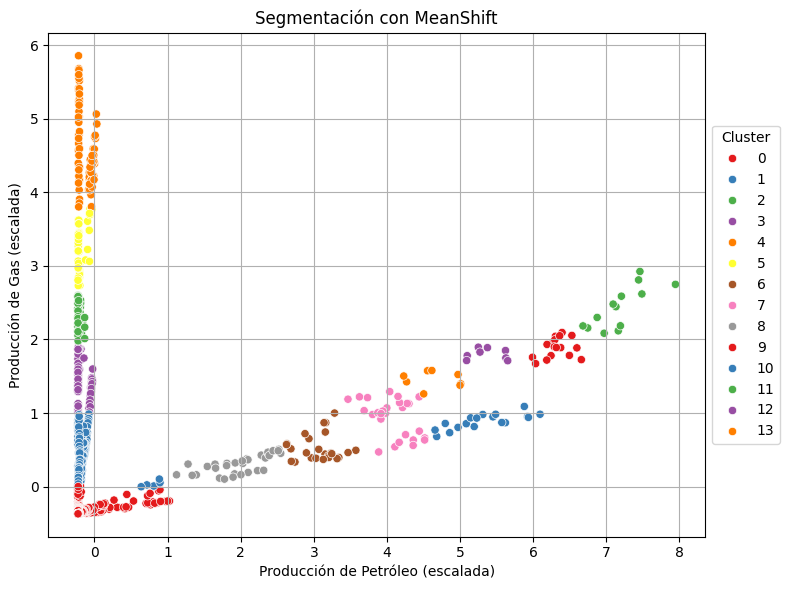

In [54]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Escalar datos (si ya lo hiciste, pod√©s omitirlo)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar MeanShift
meanshift = MeanShift()
labels_ms = meanshift.fit_predict(X_scaled)

# Visualizar
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_ms, palette='Set1')

plt.xlabel('Producci√≥n de Petr√≥leo (escalada)')
plt.ylabel('Producci√≥n de Gas (escalada)')
plt.title('Segmentaci√≥n con MeanShift')

# Leyenda a la derecha fuera del gr√°fico
plt.legend(title='Cluster', loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)
plt.tight_layout()  # Ajusta layout para que no se corte nada
plt.show()


### N√∫mero de clusters encontrados

In [44]:
n_clusters = len(set(labels_ms))
print(f"N√∫mero de clusters: {n_clusters}")


N√∫mero de clusters: 14


### Silhouette Score

In [55]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels_ms)
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.864


**Silhouette Score:** El modelo MeanShift alcanz√≥ un Silhouette Score de **0.864**, lo que indica una segmentaci√≥n **excelente**, con clusters bien separados entre s√≠ y observaciones bien agrupadas internamente.


### Calinski-Harabasz Index (Variance Ratio Criterion)

In [56]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(X_scaled, labels_ms)
print(f'Calinski-Harabasz Score: {ch_score:.3f}')


Calinski-Harabasz Score: 16180.605


**Calinski-Harabasz Score:** El modelo obtuvo un valor de **16180.605**, lo que indica una **buena calidad de agrupamiento**. Valores altos reflejan clusters bien separados y compactos, lo que refuerza la validez del resultado del modelo MeanShift.


### Davies-Bouldin Index

In [57]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_scaled, labels_ms)
print(f'Davies-Bouldin Score: {db_score:.3f}')


Davies-Bouldin Score: 0.593


**Davies-Bouldin Score:** El valor obtenido fue de **0.593**, lo cual indica una **buena separaci√≥n entre clusters**. En esta m√©trica, cuanto m√°s bajo es el valor, mejor es la definici√≥n del agrupamiento.


### Centroides de clusters (media de cada cluster)

In [59]:
import numpy as np

for cluster in set(labels_ms):
    cluster_points = X_scaled[labels_ms == cluster]
    centroid = np.mean(cluster_points, axis=0)
    print(f"Cluster {cluster}: centroid {centroid}")


Cluster 0: centroid [-0.20798455 -0.3559832 ]
Cluster 1: centroid [-0.1511656   0.46667723]
Cluster 2: centroid [-0.20608811  2.27660354]
Cluster 3: centroid [-0.16880614  1.41368967]
Cluster 4: centroid [-0.12658745  4.61096593]
Cluster 5: centroid [-0.18735644  3.23842545]
Cluster 6: centroid [3.07072629 0.52729398]
Cluster 7: centroid [4.08020343 0.94096646]
Cluster 8: centroid [1.98315425 0.30093993]
Cluster 9: centroid [6.32552189 1.89009642]
Cluster 10: centroid [5.32743647 0.8886626 ]
Cluster 11: centroid [7.18486183 2.43481244]
Cluster 12: centroid [5.37343686 1.80227927]
Cluster 13: centroid [4.64424331 1.45502519]


In [63]:
import pandas as pd

df = pd.DataFrame(X_scaled, columns=['Petroleo', 'Gas'])
df['Cluster'] = labels_ms.astype(str)  # string para gr√°ficos categ√≥ricos


### Dispersi√≥n con Seaborn

/tmp/ipython-input-64-1781602622.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


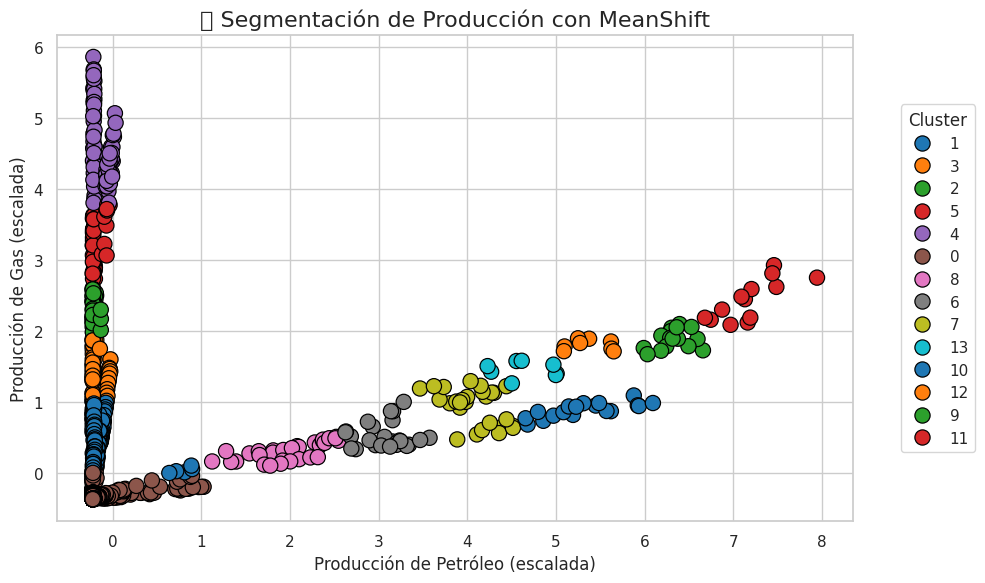

In [64]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='Petroleo', y='Gas', hue='Cluster', palette='tab10', s=120, edgecolor='black')
plt.title('üìä Segmentaci√≥n de Producci√≥n con MeanShift', fontsize=16)
plt.xlabel('Producci√≥n de Petr√≥leo (escalada)', fontsize=12)
plt.ylabel('Producci√≥n de Gas (escalada)', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()
plt.show()


**Descripci√≥n del gr√°fico:**  
El gr√°fico muestra la **segmentaci√≥n de observaciones** en funci√≥n de la **producci√≥n de petr√≥leo y gas (escaladas)** utilizando el algoritmo **MeanShift**. Cada punto representa una observaci√≥n, y los colores indican la asignaci√≥n a diferentes clusters. Se observa una clara **separaci√≥n de grupos** a lo largo de distintas combinaciones de producci√≥n, lo que refleja patrones diferenciados en el comportamiento energ√©tico.


### Boxplot de Producci√≥n por Cluster

/tmp/ipython-input-65-1210870126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Petroleo', palette='Set3')


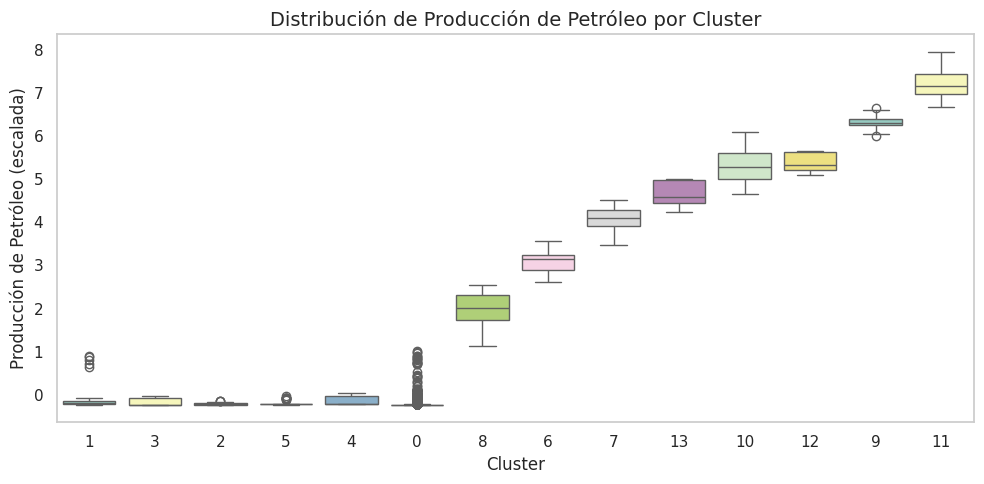

In [65]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Cluster', y='Petroleo', palette='Set3')
plt.title('Distribuci√≥n de Producci√≥n de Petr√≥leo por Cluster', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Producci√≥n de Petr√≥leo (escalada)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Descripci√≥n del gr√°fico:**  
El boxplot muestra la **distribuci√≥n de la producci√≥n de petr√≥leo (escalada)** por cada cluster identificado con MeanShift. Se observa una **clara diferenciaci√≥n entre grupos**, con clusters de baja, media y alta producci√≥n. Esto confirma que el modelo logr√≥ segmentar adecuadamente las observaciones seg√∫n sus niveles de producci√≥n.


/tmp/ipython-input-66-1290325284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Gas', palette='Set2')


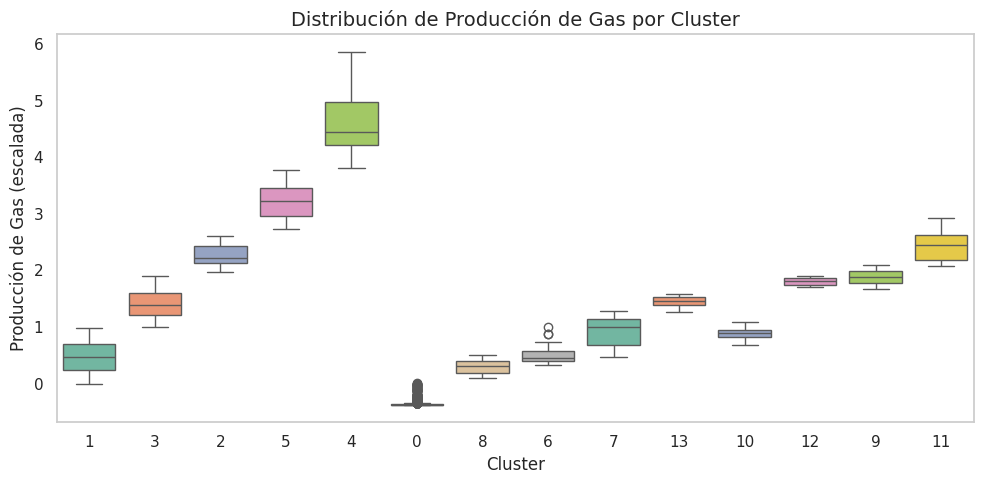

In [66]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Cluster', y='Gas', palette='Set2')
plt.title('Distribuci√≥n de Producci√≥n de Gas por Cluster', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Producci√≥n de Gas (escalada)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Descripci√≥n del gr√°fico:**  
Este boxplot muestra la **distribuci√≥n de la producci√≥n de gas (escalada)** por cluster, seg√∫n la segmentaci√≥n obtenida con MeanShift. Se identifican grupos con **altos niveles de producci√≥n** (como el Cluster 4) y otros con producci√≥n significativamente **m√°s baja** (como el Cluster 0), evidenciando una **heterogeneidad clara entre los clusters**.


### Conteo de observaciones por Cluster

/tmp/ipython-input-67-3320554080.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cluster', palette='pastel', edgecolor='black')


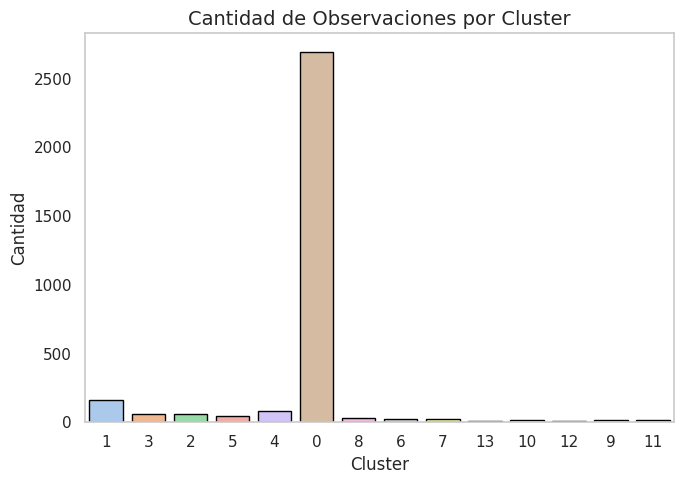

In [67]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Cluster', palette='pastel', edgecolor='black')
plt.title('Cantidad de Observaciones por Cluster', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Silhouette Score por Cluster

/tmp/ipython-input-69-3639147459.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Cluster', y='Silhouette', palette='coolwarm')


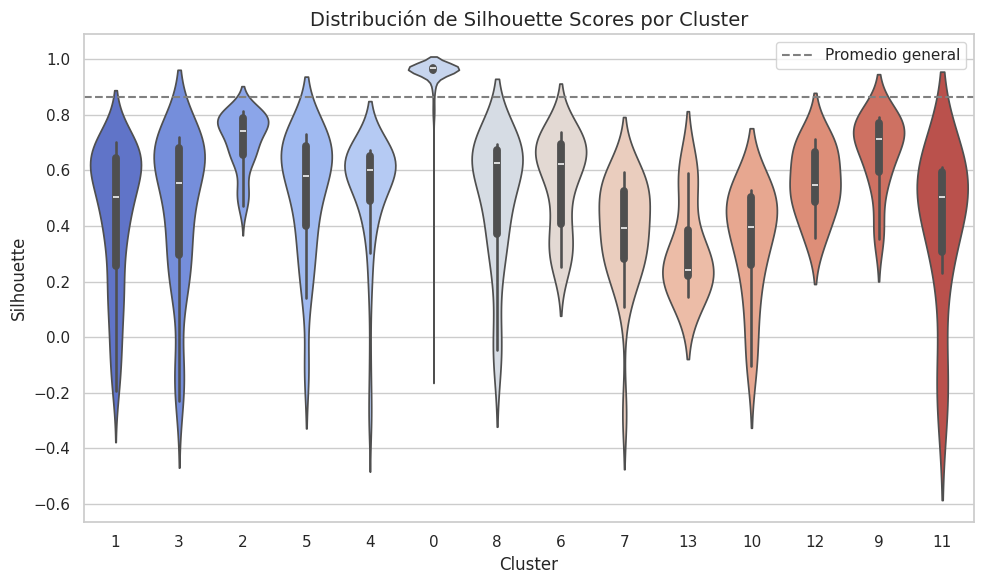

In [69]:
from sklearn.metrics import silhouette_samples

df['Silhouette'] = silhouette_samples(X_scaled, labels_ms)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Cluster', y='Silhouette', palette='coolwarm')
plt.axhline(df['Silhouette'].mean(), color='gray', linestyle='--', label='Promedio general')
plt.title('Distribuci√≥n de Silhouette Scores por Cluster', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


Este gr√°fico muestra la distribuci√≥n de los Silhouette Scores por cluster generados con el algoritmo MeanShift. El Silhouette Score mide qu√© tan bien separadas y compactas est√°n las observaciones dentro de cada cluster. Clusters con valores m√°s altos y concentrados cerca de 1 indican una mejor segmentaci√≥n, mientras que valores negativos o cercanos a cero pueden indicar observaciones mal agrupadas o fronterizas.

Bas√°ndonos en la imagen, podemos identificar qu√© clusters son m√°s fiables y cu√°les podr√≠an ser problem√°ticos.

* **Clusters bien definidos**

Estos tienen la mayor√≠a de sus puntos con Silhouette Scores altos (cercanos a 1) y con distribuciones compactas:

Cluster 2: Muy buenos scores (la mayor√≠a > 0.75), muy concentrado.

Cluster 0: Solo tiene un punto (una l√≠nea delgada), pero el score es cercano a 1.0.

Cluster 9 y 12: Distribuciones altas, bien separadas.

Cluster 11: Score elevado y distribuci√≥n sim√©trica.

Cluster 5 y 4: Tambi√©n tienen buena concentraci√≥n y scores positivos.

Estos clusters son confiables y est√°n bien separados del resto.


* **Clusters poco definidos o muy cercanos entre s√≠.**

Cluster 7 y 13: Tienen muchas observaciones con scores negativos, lo que sugiere mal agrupamiento.

Cluster 10: La mayor√≠a de los puntos est√°n entre 0 y 0.3, lo que indica baja cohesi√≥n.

Cluster 3: Presenta valores negativos tambi√©n.

Cluster 8 y 6: Algunos scores negativos, aunque no tan preocupantes como 7 o 13.

Estos clusters pueden requerir revisi√≥n.

### Estimar autom√°ticamente el bandwidth

In [70]:
from sklearn.cluster import estimate_bandwidth

# Estimar bandwidth con una fracci√≥n del total de datos (quantile = 0.2 es com√∫n)
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)

print(f"Bandwidth estimado: {bandwidth:.3f}")

# Aplicar MeanShift con ese bandwidth
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=bandwidth)
labels_ms = meanshift.fit_predict(X_scaled)

# N√∫mero de clusters nuevos
n_clusters = len(set(labels_ms))
print(f"N√∫mero de clusters encontrados: {n_clusters}")


Bandwidth estimado: 0.562
N√∫mero de clusters encontrados: 12


### Visualizar la nueva segmentaci√≥n

/tmp/ipython-input-71-1299344392.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


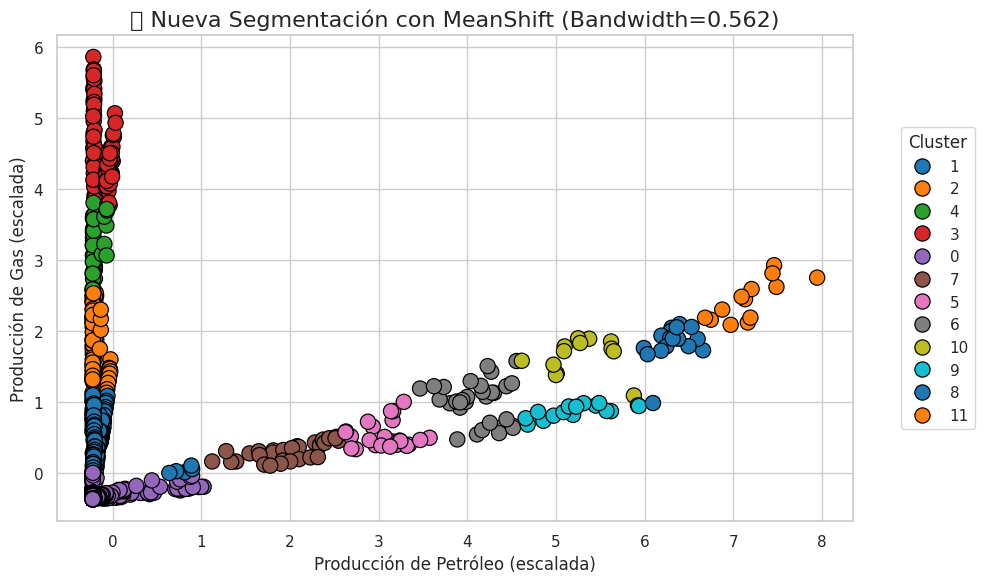

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear nuevo DataFrame con etiquetas
df = pd.DataFrame(X_scaled, columns=['Petroleo', 'Gas'])
df['Cluster'] = labels_ms.astype(str)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='Petroleo', y='Gas', hue='Cluster', palette='tab10', s=120, edgecolor='black')
plt.title('üìä Nueva Segmentaci√≥n con MeanShift (Bandwidth=0.562)', fontsize=16)
plt.xlabel('Producci√≥n de Petr√≥leo (escalada)', fontsize=12)
plt.ylabel('Producci√≥n de Gas (escalada)', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()
plt.show()


### Silhouette Score

In [72]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels_ms)
print(f"Silhouette Score con bandwidth=0.562: {score:.3f}")


Silhouette Score con bandwidth=0.562: 0.866


/tmp/ipython-input-73-225996833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Cluster', y='Silhouette', palette='coolwarm')


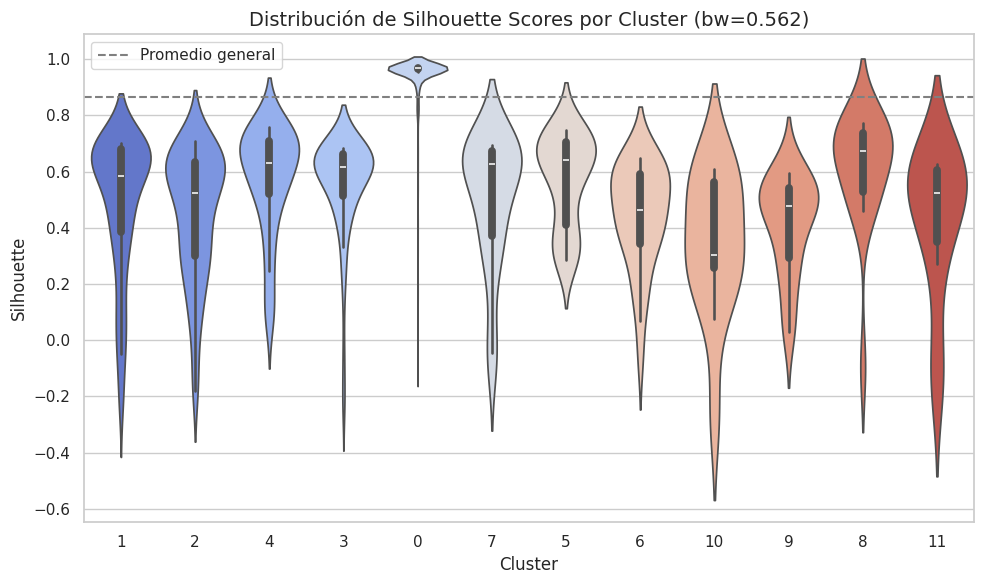

In [73]:
from sklearn.metrics import silhouette_samples

df['Silhouette'] = silhouette_samples(X_scaled, labels_ms)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Cluster', y='Silhouette', palette='coolwarm')
plt.axhline(df['Silhouette'].mean(), color='gray', linestyle='--', label='Promedio general')
plt.title('Distribuci√≥n de Silhouette Scores por Cluster (bw=0.562)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-76-1678103772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Petroleo', palette='Set2')


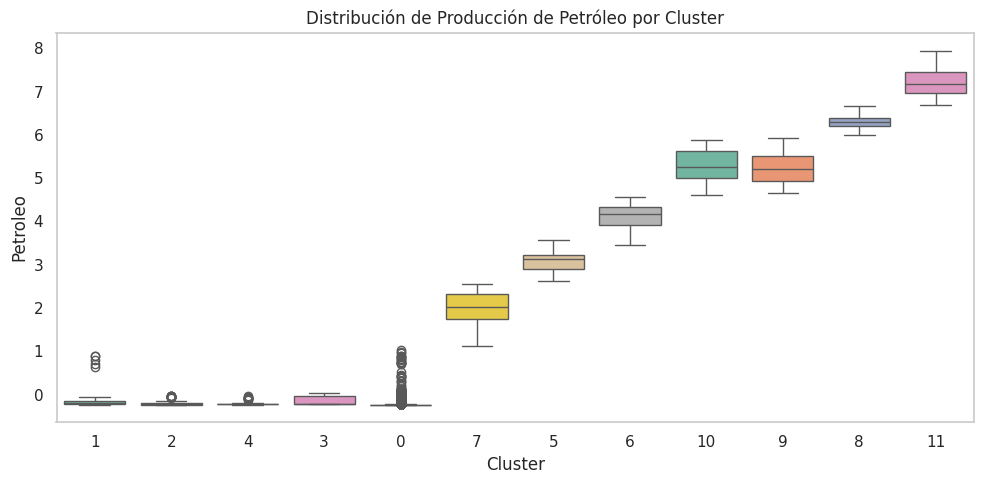

/tmp/ipython-input-76-1678103772.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Gas', palette='Set3')


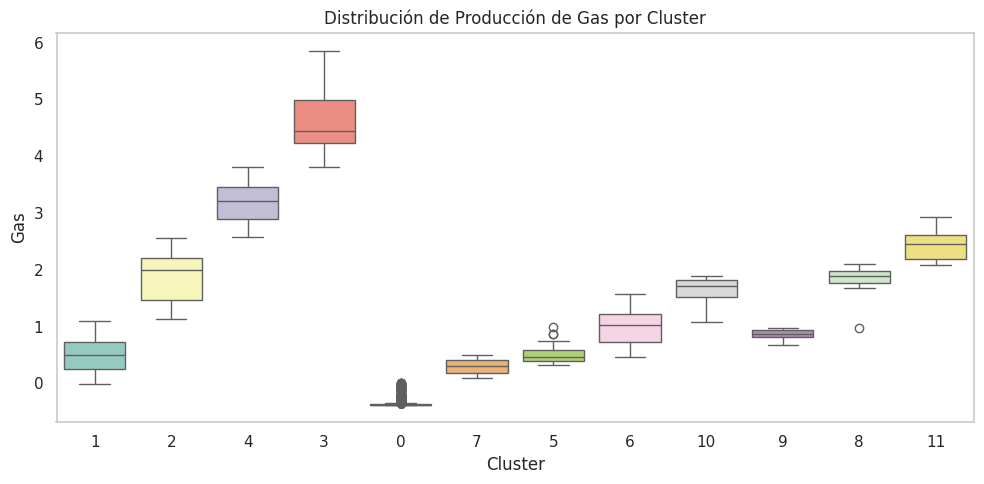

In [76]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Cluster', y='Petroleo', palette='Set2')
plt.title('Distribuci√≥n de Producci√≥n de Petr√≥leo por Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Cluster', y='Gas', palette='Set3')
plt.title('Distribuci√≥n de Producci√≥n de Gas por Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Detectar los clusters m√°s d√©biles

Clusters con menor Silhouette promedio:
Cluster
10    0.340768
9     0.409998
11    0.425605
6     0.441949
2     0.445081
Name: Silhouette, dtype: float64


/tmp/ipython-input-77-2938843082.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Silhouette', palette='coolwarm')


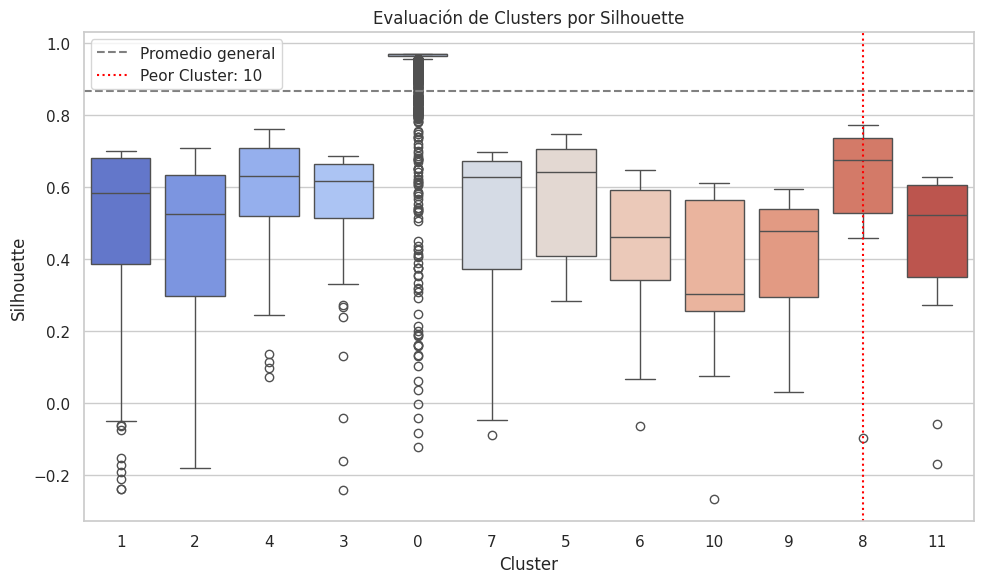

In [77]:
# Promedio por cluster
silhouette_promedios = df.groupby('Cluster')['Silhouette'].mean().sort_values()

print("Clusters con menor Silhouette promedio:")
print(silhouette_promedios.head())

# Destacar el peor cluster visualmente
cluster_peor = silhouette_promedios.idxmin()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='Silhouette', palette='coolwarm')
plt.title('Evaluaci√≥n de Clusters por Silhouette')
plt.axhline(df['Silhouette'].mean(), color='gray', linestyle='--', label='Promedio general')
plt.axvline(int(cluster_peor), color='red', linestyle=':', label=f'Peor Cluster: {cluster_peor}')
plt.legend()
plt.tight_layout()
plt.show()


* Clusters 1, 2, 4, 3 y 0 tienen Silhouette Scores altos y medianas cercanas a 0.6‚Äì0.7, lo cual indica buena separaci√≥n y cohesi√≥n interna. Son clusters bien definidos.

* Cluster 8 es interesante: tiene una mediana cercana a 0.7, pero muy pocos puntos, y algunos outliers bajos.

* Cluster 10 es el peor evaluado:

Tiene la mediana m√°s baja (menor a 0.4).

Amplia dispersi√≥n de scores.

Muchos puntos est√°n mal ubicados (algunos por debajo de 0).

Por eso fue marcado con la l√≠nea roja.

* Clusters 5, 6, 7 y 9 tambi√©n tienen algo de dispersi√≥n, pero no tan graves como el 10.



Conclusi√≥n

La mayor√≠a de los clusters tienen una segmentaci√≥n adecuada, con buenos niveles de cohesi√≥n y separaci√≥n. Sin embargo, el Cluster 10 muestra un rendimiento pobre, con baja calidad en la asignaci√≥n de sus observaciones.